In [3]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import joblib
print(sklearn.__version__)

1.3.2


In [6]:
# AI Personalized Medicine System
# df1 = pd.read_csv("/dbfs/FileStore/tables/medical_data-1.csv")
pandas_df = pd.read_csv('medical_data.csv')

In [7]:
pandas_df.isnull().sum()

Name           46
DateOfBirth    46
Gender         45
Symptoms       40
Causes         42
Disease        38
Medicine       45
dtype: int64

In [8]:
pandas_df

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
0,John Doe,15-05-1980,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
1,Jane Smith,10-08-1992,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
2,Michael Lee,20-02-1975,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
3,Emily Chen,03-11-1988,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
4,Alex Wong,12-06-2001,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin
...,...,...,...,...,...,...,...
282,Ava Lim,11-07-1993,Female,"Cough, Shortness of breath",COVID-19 Exposure,COVID-19,"Isolation, Fluids"
283,Liam Goh,16-09-1987,Male,"Itching, Redness",Allergies,Allergic Reaction An,tihistamine
284,Sophie Tan,18-02-1975,Female,"Muscle Pain, Fatigue",Overexertion,Muscle Strain,"Rest, Pain Relievers"
285,Noah Lim,21-05-2005,Male,"Nausea, Vomiting",Food Poisoning,Muscle Strain,Rehydration


In [9]:
pandas_df['DateOfBirth'] = pd.to_datetime(pandas_df['DateOfBirth'])

C:\Users\Gan Qing Rong\AppData\Local\Temp\ipykernel_31276\4138771068.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pandas_df['DateOfBirth'] = pd.to_datetime(pandas_df['DateOfBirth'])


In [10]:
mean_date = pandas_df['DateOfBirth'].dropna().mean()

In [11]:
pandas_df['DateOfBirth'].fillna(mean_date, inplace=True)

C:\Users\Gan Qing Rong\AppData\Local\Temp\ipykernel_31276\1117711912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pandas_df['DateOfBirth'].fillna(mean_date, inplace=True)


In [12]:
columns = ['Gender', 'Symptoms', 'Causes', 'Disease', 'Medicine']
for column in columns:
    pandas_df[column].fillna(pandas_df[column].mode()[0], inplace=True)

C:\Users\Gan Qing Rong\AppData\Local\Temp\ipykernel_31276\3640952164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pandas_df[column].fillna(pandas_df[column].mode()[0], inplace=True)


In [13]:
pandas_df.isnull().sum()

Name           46
DateOfBirth     0
Gender          0
Symptoms        0
Causes          0
Disease         0
Medicine        0
dtype: int64

In [14]:
pandas_df['Name'].fillna('Unknown Patient', inplace=True)

C:\Users\Gan Qing Rong\AppData\Local\Temp\ipykernel_31276\3639085752.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pandas_df['Name'].fillna('Unknown Patient', inplace=True)


In [15]:
pandas_df

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
0,John Doe,1980-05-15,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
1,Jane Smith,1992-08-10,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
2,Michael Lee,1975-02-20,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
3,Emily Chen,1988-11-03,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
4,Alex Wong,2001-06-12,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin
...,...,...,...,...,...,...,...
282,Ava Lim,1993-07-11,Female,"Cough, Shortness of breath",COVID-19 Exposure,COVID-19,"Isolation, Fluids"
283,Liam Goh,1987-09-16,Male,"Itching, Redness",Allergies,Allergic Reaction An,tihistamine
284,Sophie Tan,1975-02-18,Female,"Muscle Pain, Fatigue",Overexertion,Muscle Strain,"Rest, Pain Relievers"
285,Noah Lim,2005-05-21,Male,"Nausea, Vomiting",Food Poisoning,Muscle Strain,Rehydration


In [ ]:
# Exploratory Data Analysis

In [ ]:
import plotly.express as px

In [16]:
encoder = LabelEncoder()

X = pandas_df[['Disease']]
df = X.apply(encoder.fit_transform)

In [17]:
X.Disease.unique()

array(['Common Cold', 'Migraine', 'Asthma', 'Gastroenteritis',
       'Strep Throat', 'Arthritis', 'Hypertension', 'Allergic Reaction',
       'Indigestion', 'Major Depressive', 'Influenza', 'Motion Sickness',
       'Chronic Bronchitis', 'Gastritis', 'Rheumatoid Arthritis',
       'Tonsillitis', 'Sciatica', 'Morning Sickness', 'Iron Deficiency',
       'Panic Disorder', 'Sleep Apnea', 'Dermatitis',
       'Respiratory infection', 'Heat Exhaustion', 'Tension Headache',
       'Menstrual Cramps', 'Coronary ArteryDisease', 'Thyroid Disorder',
       'Pneumonia', 'COVID-19', 'Muscle Strain', 'Vision Fatigue',
       'Herniated Disc', 'Chronic Fatigue Syndrome', 'Anxiety Disorder',
       'Muscle Overuse', 's  Arthritis', 'Major Depressive Disorder',
       'Allergic Reacti', 'Chronic Fatigue', 'Syndrome', ' Arthritis',
       'RespiratoryInfection', 'Coronary Artery', 'is  Arthritis',
       'Respiratory Infection', 'Coronary Artery Disease', 'Respiratory',
       'Infection', 'Disease', 

In [18]:
df

,Disease
0,14
1,39
2,8
3,24
4,58
...,...
282,10
283,4
284,44
285,44


In [19]:
pandas_df

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
0,John Doe,1980-05-15,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
1,Jane Smith,1992-08-10,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
2,Michael Lee,1975-02-20,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
3,Emily Chen,1988-11-03,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
4,Alex Wong,2001-06-12,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin
...,...,...,...,...,...,...,...
282,Ava Lim,1993-07-11,Female,"Cough, Shortness of breath",COVID-19 Exposure,COVID-19,"Isolation, Fluids"
283,Liam Goh,1987-09-16,Male,"Itching, Redness",Allergies,Allergic Reaction An,tihistamine
284,Sophie Tan,1975-02-18,Female,"Muscle Pain, Fatigue",Overexertion,Muscle Strain,"Rest, Pain Relievers"
285,Noah Lim,2005-05-21,Male,"Nausea, Vomiting",Food Poisoning,Muscle Strain,Rehydration


In [20]:
X = pandas_df['Symptoms'] + ' ' + pandas_df['Causes'] + ' ' + pandas_df['Medicine'] + ' ' + pandas_df['Gender']

In [21]:
y = df.Disease

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
vectorizer = CountVectorizer(stop_words="english").fit(X_train)
df_train = vectorizer.transform(X_train)
df_train = pd.DataFrame(df_train.toarray(),
                        columns=vectorizer.get_feature_names_out())

In [24]:
df_train

,19,abdominal,acetaminophen,aches,albuterol,allergies,amlodipine,anemia,antacids,antibiotics,...,tihistamine,topical,triggers,viral,virals,vision,vitamin,vomiting,weakness,weather
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [25]:
df_test = vectorizer.transform(X_test)
df_test = pd.DataFrame(df_test.toarray(),
                        columns=vectorizer.get_feature_names_out())

In [26]:
tfidf = TfidfTransformer()
df_train_idf = tfidf.fit(df_train)
df_train_tfidf = df_train_idf.transform(df_train)
df_test_idf = tfidf.fit(df_test)
df_test_tfidf = df_test_idf.transform(df_test)

In [27]:
clf = LogisticRegression().fit(df_train_tfidf, y_train)

In [28]:
lr_model = LogisticRegression()
lr_model.fit(df_train_tfidf, y_train)
lr_pred = lr_model.predict(df_test_tfidf)
lr_model.score(df_test_tfidf, y_test)

0.8275862068965517

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(df_train_tfidf, y_train)
rf_pred = rf_model.predict(df_test_tfidf)
rf_model.score(df_test_tfidf, y_test)

0.8793103448275862

In [30]:
knn_model = KNeighborsClassifier()
knn_model.fit(df_train_tfidf, y_train)
knn_pred = knn_model.predict(df_test_tfidf)
knn_model.score(df_test_tfidf, y_test)

0.8103448275862069

In [31]:
svc_model = SVC(kernel='linear', C=0.025)
svc_model.fit(df_train_tfidf, y_train)
svc_pred = svc_model.predict(df_test_tfidf)
svc_model.score(df_test_tfidf, y_test)

0.27586206896551724

In [32]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(df_train_tfidf, y_train)
dt_pred = dt_model.predict(df_test_tfidf)
dt_model.score(df_test_tfidf, y_test)

0.39655172413793105

In [33]:
clf = RandomForestClassifier().fit(df_train_tfidf, y_train)

In [34]:
# Download best model, RandomForest Algorithm
joblib.dump(clf,'rf_model_dis_vector.joblib')

['rf_model_dis_vector.joblib']

In [35]:
joblib.dump(vectorizer,'vectorizer.joblib')

['vectorizer.joblib']

In [ ]:
# Data Visualizations
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 282 kB 5.9 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-91d4fd28-28e4-490d-b1f6-9addc32ea8c8/bin/python -m pip install --upgrade pip' command.


In [36]:
tokens_causes = pandas_df.Causes

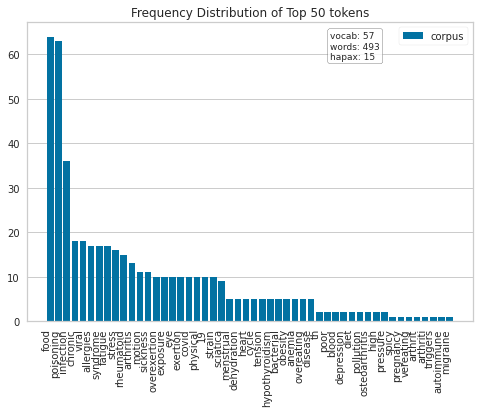

Out[228]: <AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [ ]:
# Data Visualizations
docs = vectorizer.fit_transform(tokens_causes)
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()